<a href="https://colab.research.google.com/github/ucfilho/vichebling2810/blob/main/Textura/BRIX_suco_textura_ANN_vesrsao_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import Sequential
'''sequential significa que vai montar a rede neural etapa por etapa'''

from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
'''dentro do keras.layers estamos carregando dense, activation e etc.. para montar as 
camadas da rede neural'''

import numpy as np
'''O NumPy é uma biblioteca para a linguagem Python com funções 
para se trabalhar com computação numérica. Neste caso estamos 
chamando numpy de np para economizar tempo na digitação deste código'''

import pandas as pd
'''Pandas é um biblioteca para manipulação e análise de dados. 
Neste caso estamos chamando pandas de pd para economizar tempo 
na digitação deste código'''

import cv2
'''computer vision, biblioteca que trabalha com processamento de imagem'''

import random
'''Este módulo implementa geradores de números pseudoaleatórios para várias 
distribuições.'''

import zipfile
'''Este módulo fornece ferramentas para criar, ler, escrever, adicionar, 
e listar um arquivo ZIP.'''

from matplotlib import pyplot as plt
'''Matplotlib.pyplot serve para plotar gráficos, sendo que esta
biblioteca permite a personalização dos gráficos, tais como: tamanho
da figura, largura da linha, cor, estilo e etc...'''

from sklearn.svm import SVC
'''Uma máquina de vetores de suporte (SVM, do inglês: support vector machine) é 
um conceito na ciência da computação para um conjunto de métodos de aprendizado
 supervisionado que analisam os dados e reconhecem padrões, sendo usado neste 
 caso para fazer classificação (SVC, do inglês: Support Vector Classification)'''

from sklearn import preprocessing
'''o preprocessing é usado para fazer normatização os dados'''

from sklearn.model_selection import train_test_split
''' serve para separar os dados em treino e o teste'''

from sklearn.metrics import classification_report
'''serve para criar um relatório das métricas'''

import skimage
'''serve para calcular propriedades de textura'''
from skimage import feature
'''serve para calcular propriedades de textura'''


from sklearn.neural_network import MLPClassifier
'''serve para fazer a rede neural'''
from sklearn.metrics import confusion_matrix
'''serve para avaliar a ANN segund matrix confusao'''
from sklearn.metrics import accuracy_score

In [2]:
# convert green color in gray image

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

In [3]:
#clonando os dados que estão na pasta ANN do github
!git clone https://github.com/victoriahebling/laranjas
%cd laranjas

fatal: destination path 'laranjas' already exists and is not an empty directory.
/content/laranjas


In [4]:
#Arq =['PH_suco_0.zip','PH_suco_1.zip','PH_suco_2.zip']
Arq =['BRIX_suco_0.zip','BRIX_suco_1.zip','BRIX_suco_2.zip']

img_name=[]
x_gray=[]
x_original = []
for FILE in Arq:
  file_name = zipfile.ZipFile(FILE, 'r')
  file_name.extractall()
  with zipfile.ZipFile(FILE, "r") as f:
      for name in f.namelist():
          img_name.append(name)

In [5]:
print(img_name)

['0 (2).png', '0 (3).png', '0 (4).png', '0 (5).png', '0 (6).png', '0 (7).png', '0 (8).png', '0 (9).png', '0 (10).png', '0.png', '1 (2).png', '1 (3).png', '1 (4).png', '1 (5).png', '1 (6).png', '1 (7).png', '1 (8).png', '1 (9).png', '1 (10).png', '1 (11).png', '1 (12).png', '1 (13).png', '1 (14).png', '1 (15).png', '1 (16).png', '1 (17).png', '1.png', '2 (2).png', '2 (3).png', '2 (4).png', '2 (5).png', '2 (6).png', '2 (7).png', '2 (8).png', '2 (9).png', '2 (10).png', '2 (11).png', '2 (12).png', '2 (13).png', '2 (14).png', '2 (15).png', '2 (16).png', '2 (17).png', '2 (18).png', '2 (19).png', '2 (20).png', '2 (21).png', '2 (22).png', '2 (23).png', '2 (24).png', '2 (25).png', '2 (26).png', '2 (27).png', '2 (28).png', '2 (29).png', '2 (30).png', '2 (31).png', '2 (32).png', '2 (33).png', '2.png']


In [6]:
y_names = []
for yy in img_name:    
  '''para cada nome presente na lista img_name'''
  name = yy[0]
  '''extraindo as 3 primeiras letras de cada elemento yy'''
  y_names.append(name)  
  '''adicionando as letras extraídas anteriormente na lista y_names'''

In [7]:
unique_list = []    
'''lista em branco '''
for yy in y_names:  
  '''para cada elemento de y_name será rodado o ciclo de repetição abaixo'''
  if yy not in unique_list: 
    '''se o elemento não estiver na lista unique_list'''
    unique_list.append(yy)  
    '''adicionar o elemeneto yy na lista unique_list'''

In [8]:
print(unique_list)
'''printando as classes que foram obtidas a partir da extração das 3 primeiras
letras das imagens'''

['0', '1', '2']


'printando as classes que foram obtidas a partir da extração das 3 primeiras\nletras das imagens'

In [9]:
n = len(unique_list) 
'''len (do inglês: length) serve para pegar o tamannho da lista chamada unique_list'''
y = []    
'''criando uma lista vazia chamada y'''
for yy in y_names: 
  '''for irá percorrer cada elemento de y_names'''
  for i in range(n):
    '''for irá percorrer nos valores n'''
    if(yy == unique_list[i]):
      '''se o yy que esta em y_names for igual ao unique_list de y'''
      y.append(i)
      '''então será acrescentado i na lista y'''

In [10]:
print(y)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [11]:
DATASET_SIZE = len(y_names)
'''DATA_SIZE recebe o comprimento de y_names'''
Ind = range(DATASET_SIZE)
Img_Size = 80
'''Img_Size recebe 80'''
num_range = DATASET_SIZE

In [12]:
Ind_train, Ind_test= train_test_split(Ind,test_size=0.20, shuffle=True, random_state=3)
'''separando o treino e o teste, sendo 20% dos dados para teste e 80% para treino
shuffle embaralha os dados'''

'separando o treino e o teste, sendo 20% dos dados para teste e 80% para treino\nshuffle embaralha os dados'

In [13]:
X_train = []  
'''X_train recebe lista em branco'''
Y_train = []  
'''Y_train recebe lista em branco'''
for II in Ind_train:
  '''for irá percorrer o Ind_train'''
  name = img_name[II]
  '''name recebe o img_name de II'''
  X_train.append(cv2.resize(cv2.imread(name),(Img_Size,Img_Size)))
  ''' a partir do módulo computer vision será feito o resize das imagens, ou seja, as imagens irão mudar sua resolução'''
  Y_train.append(y[II])
  '''os y[II] serão adicionados na lista Y_train'''

In [14]:
X_test= []  
'''X_test recebe lista em branco'''
Y_test = [] 
'''Y_test recebe lista em branco'''
i =0
for II in Ind_test:
  '''for irá percorrer o Ind_test'''
  name = img_name[II]
  '''name recebe o img_name de II'''
  X_test.append(cv2.resize(cv2.imread(name),(Img_Size,Img_Size)))
  '''a partir do módulo computer vision será feito o resize das imagens, ou seja, as imagens irão mudar sua resolução'''
  Y_test.append(y[II])

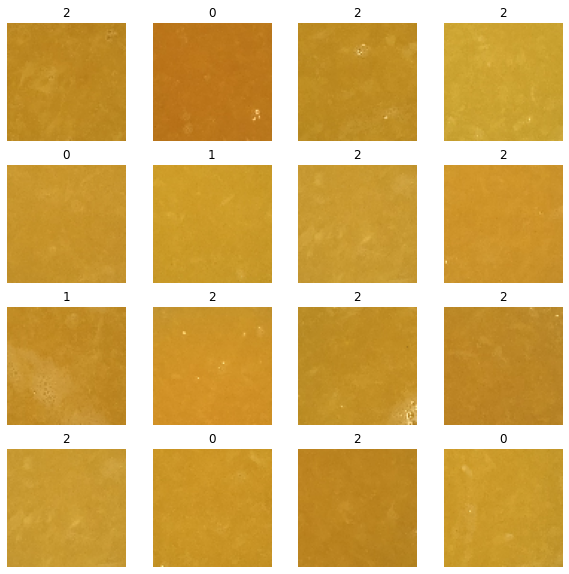

In [15]:
# mostrando as imagens do treino

num = len(Y_train)
'''num recebe o tamanho de Y_train'''
plt.figure(figsize=(10, 10))
'''plotando 10 polegadas de altura pro 10 polegadas de comprimento'''
for i in range(16): 
  '''i vai percorrer até 16'''
  ax = plt.subplot(4, 4, i + 1)
  kk = int(random.randrange(num))
  RGB_img = cv2.cvtColor(X_train[kk], cv2.COLOR_BGR2RGB)
  '''transformando a foto de BGR para RGB'''
  plt.imshow(RGB_img)
  '''mostrando a imagem'''
  plt.title(Y_train[kk])
  '''o titulo de cada imagem será o Y_train referente à imagem'''
  plt.axis("off")
  '''não plotar eixo'''

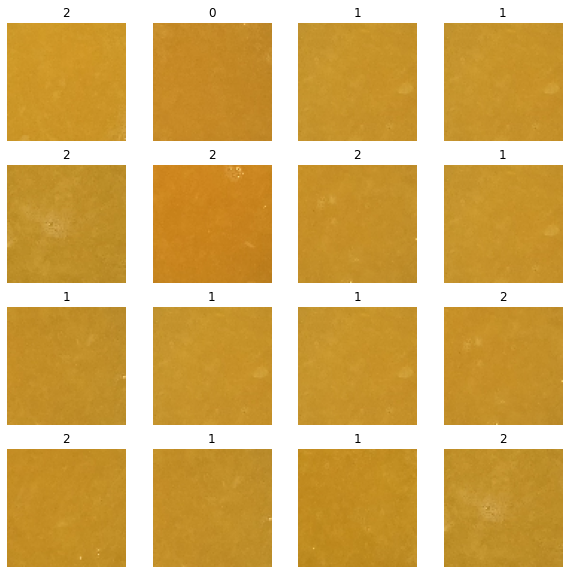

In [16]:
# mostrando as imagens do teste

num = len(Y_test)
'''num recebe o tamanho de Y_test'''
plt.figure(figsize=(10, 10))
'''plotando 10 polegadas de altura pro 10 polegadas de comprimento'''
for i in range(16):  
  '''i irá percorrer até 16'''
  ax = plt.subplot(4, 4, i + 1)
  kk = int(random.randrange(num))
  RGB_img = cv2.cvtColor(X_test[kk], cv2.COLOR_BGR2RGB)
  '''transformando a imagem BGR para RGB'''
  plt.imshow(RGB_img)
  '''mostrando a imagem'''
  plt.title(Y_test[kk])
  '''o titulo de cada imagem será o Y_test referente à cada foto'''
  plt.axis("off")
  '''não plotar eixos'''

In [17]:
X_new = []
'''criando uma lista vazia chamada X_new'''
for XX in X_train:
  '''para cada elemento XX de X_train'''
  X_new.append(XX)
  '''XX será acrescentado na lista X_nee'''
#print(XX)
'''printando XX'''
X_train = X_new.copy()
'''X_train recebe a cópia de X_new'''

X_new = []
'''criando uma lista vazia chamada X_new'''
for XX in X_test:
  '''para cada elemento XX de X_test'''
  X_new.append(XX)
  '''XX será acrescentado na lista X_new'''
X_test = X_new.copy()
'''X_test recebe a cópia de X_new'''

'X_test recebe a cópia de X_new'

In [18]:
def ynindicator(Y):
  '''criando uma função chamada de ynindicator que recebe como parâmetro Y'''
  N = len(Y)
  '''N recebe o comprimento de Y'''
  K = len(set(Y))
  '''K recebe o comprimento de set(Y)'''
  I = np.zeros((N, K))
  I[np.arange(N), Y] = 1
  return I
  '''a funçãi ynindicator irá retornar I'''

In [19]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)
K = len(set(Y_train))
# X_train = X_train /255.0
Y_train = Y_train.astype(np.int32)
#Y_train = ynindicator(Y_train)

X_test = np.array(X_test)
Y_test = np.array(Y_test)
#X_test = X_test /255.0
Y_test = Y_test.astype(np.int32)
#Y_test = ynindicator(Y_test)

(-0.5, 79.5, 79.5, -0.5)

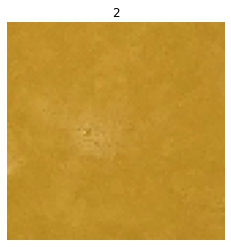

In [20]:
# imagem teste sem o filtro
indice_teste = 0
RGB_img = cv2.cvtColor(X_test[indice_teste], cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)
plt.title(Y_test[kk])
plt.axis("off")

(-0.5, 79.5, 79.5, -0.5)

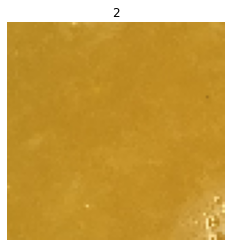

In [21]:
# imagem teste sem o filtro
indice_train = 0
RGB_img = cv2.cvtColor(X_train[indice_train], cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)
plt.title(Y_train[indice_train])
plt.axis("off")

In [22]:
#read image
# extract green color
src =RGB_img
print(src.shape)

# extract green channel
green_channel = src[:,:,1]

# create empty image with same shape as that of src image
green_img = np.zeros(src.shape)

#assign the green channel of src to empty image
green_img[:,:,1] = green_channel

# https://pythonexamples.org/python-opencv-extract-green-channel-from-color-image/

(80, 80, 3)


In [23]:
img = green_img     
gray = rgb2gray(img) 
gray = np.uint8(gray)
# https://stackoverflow.com/questions/12201577/how-can-i-convert-an-rgb-image-into-grayscale-in-python

(-0.5, 79.5, 79.5, -0.5)

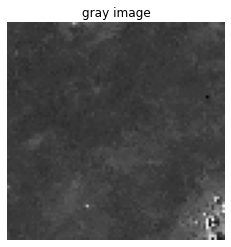

In [24]:
plt.imshow(gray,cmap='gray')
plt.title('gray image')
plt.axis("off")

In [25]:
# !pip install skimage

In [26]:

# construir os momentos
image = gray

g = skimage.feature.greycomatrix(image, [1, 2], [0, np.pi/2], levels=255,normed=True, symmetric=True)
contrast = skimage.feature.greycoprops(g, 'contrast')
print(contrast) 


[[15.44018987 10.70712025]
 [14.92980769 13.64423077]]


In [27]:
PROPS = ['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation', 'ASM']

In [28]:
contrast.max()

15.440189873417722

In [29]:
for nome in PROPS:
  propriedade = skimage.feature.greycoprops(g, nome)
  max_prop = propriedade.max()
  print(nome,'=====',max_prop) 


contrast ===== 15.440189873417722
dissimilarity ===== 1.9365384615384613
homogeneity ===== 0.49888377156545727
energy ===== 0.16938636635572052
correlation ===== 0.6943832806193101
ASM ===== 0.028691741107194364


In [30]:
# As textural features, angular second moment (ASM), inverse
# difference moment (IDM) and contrast (Haralick et al., 1973)
#  Machine vision based quality evaluation of Iyokan orange fruit using neural networks
# IDM = homogeneity

In [31]:
''' Extracao de textura nas fotos treino'''
rows = X_train.shape[0]
cols = len(PROPS)

Texture_train = np.zeros((rows,cols))

for i in range(rows):
  RGB_img = cv2.cvtColor(X_train[i], cv2.COLOR_BGR2RGB)
  src =RGB_img
  green_channel = src[:,:,1]
  green_img = np.zeros(src.shape)
  green_img[:,:,1] = green_channel
  img = green_img     
  gray = rgb2gray(img) 
  gray = np.uint8(gray)
  image = gray
  g = skimage.feature.greycomatrix(image, [1, 2], [0, np.pi/2], levels=255,normed=True, symmetric=True)

  for j in range(cols):
    propriedade = skimage.feature.greycoprops(g, PROPS[j])
    max_prop = propriedade.max()
    Texture_train[i,j] = max_prop

Texture_train = pd.DataFrame(Texture_train, columns=PROPS)
print(Texture_train)

     contrast  dissimilarity  homogeneity    energy  correlation       ASM
0   15.440190       1.936538     0.498884  0.169386     0.694383  0.028692
1    6.091987       1.681090     0.491694  0.174227     0.512418  0.030355
2    4.162981       1.533494     0.508225  0.167623     0.638033  0.028097
3    7.083173       1.190545     0.594653  0.196299     0.586497  0.038533
4    7.984455       2.015545     0.449876  0.145276     0.564451  0.021105
5    6.644391       1.719712     0.494388  0.164500     0.609947  0.027060
6    7.256731       1.453205     0.544628  0.211159     0.481028  0.044588
7    3.460737       1.202724     0.566521  0.223067     0.456173  0.049759
8    6.561538       1.893590     0.458582  0.142231     0.667159  0.020230
9    3.741827       1.404808     0.529315  0.190969     0.590319  0.036469
10  11.311538       2.170513     0.449636  0.123984     0.744679  0.015372
11   9.375962       1.905449     0.475113  0.157174     0.594046  0.024704
12   2.852724       1.245

In [32]:
''' Extracao de textura nas fotos teste'''
rows = X_test.shape[0]
cols = len(PROPS)

Texture_test = np.zeros((rows,cols))

for i in range(rows):
  RGB_img = cv2.cvtColor(X_test[i], cv2.COLOR_BGR2RGB)
  src =RGB_img
  green_channel = src[:,:,1]
  green_img = np.zeros(src.shape)
  green_img[:,:,1] = green_channel
  img = green_img     
  gray = rgb2gray(img) 
  gray = np.uint8(gray)
  image = gray
  g = skimage.feature.greycomatrix(image, [1, 2], [0, np.pi/2], levels=255,normed=True, symmetric=True)

  for j in range(cols):
    propriedade = skimage.feature.greycoprops(g, PROPS[j])
    max_prop = propriedade.max()
    Texture_test[i,j] = max_prop

Texture_test = pd.DataFrame(Texture_test, columns=PROPS)
print(Texture_test)

    contrast  dissimilarity  homogeneity    energy  correlation       ASM
0   7.561218       1.995833     0.448062  0.145822     0.634688  0.021264
1   4.789423       1.554487     0.509983  0.179595     0.568241  0.032254
2   4.531731       1.383333     0.542018  0.207453     0.518828  0.043037
3   5.676763       1.652404     0.504824  0.190006     0.570605  0.036102
4   5.020353       1.433494     0.544301  0.214582     0.443198  0.046045
5   4.841987       1.519712     0.520336  0.199600     0.467194  0.039840
6   3.872917       1.410096     0.521564  0.192951     0.522906  0.037230
7   8.445513       1.557853     0.526705  0.184602     0.501537  0.034078
8   3.734936       1.385256     0.552809  0.181445     0.715143  0.032922
9   3.801603       1.431410     0.526881  0.193020     0.527899  0.037257
10  3.832212       1.433494     0.528826  0.190317     0.608561  0.036221
11  3.443910       1.268590     0.563418  0.204866     0.609766  0.041970


In [33]:
PROPS = ['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation', 'ASM']
#PROPS_SELEC = ['homogeneity',  'ASM']
#PROPS_SELEC = ['homogeneity',  'energy']
#PROPS_SELEC = ['dissimilarity',  'ASM']
PROPS_SELEC = ['contrast',  'homogeneity',  'ASM']
#PROPS_SELEC = ['contrast',  'homogeneity',  'energy']
#PROPS_SELEC = ['contrast',  'dissimilarity',  'ASM']
#PROPS_SELEC = ['contrast',  'homogeneity', 'correlation',  'ASM']
#PROPS_SELEC = ['contrast',  'homogeneity', 'correlation', 'energy']
#PROPS_SELEC = ['contrast',  'dissimilarity', 'correlation','ASM']
#PROPS_SELEC = ['homogeneity', 'correlation',  'ASM']
#PROPS_SELEC = ['homogeneity', 'correlation', 'energy']
#PROPS_SELEC = ['dissimilarity', 'correlation','ASM']
'''parte da rede neural '''
# transforma os dados-escalona 
X_train = np.array(Texture_train[PROPS_SELEC])
X_test = np.array(Texture_test[PROPS_SELEC])
scaler_X = preprocessing.MinMaxScaler((-1,1)).fit(X_train)
X_train = scaler_X.transform(X_train)
X_test = scaler_X.transform(X_test)
Neuronios = range(2,30)
Cols_names = ['Neurons','acc treino','acc treino']
rows = len(Neuronios)
cols = len(Cols_names)
Escolhe_ANN = np.zeros((rows,cols))
k = 0
for Neurons_Num in Neuronios:
  # define a rede neural 
  model = MLPClassifier(solver='lbfgs',activation='tanh',alpha=1e-5,
                        hidden_layer_sizes=(Neurons_Num),random_state=1)
  # treina a rede neural
  model.fit(X_train, Y_train)

  # usa a rede neural treina em calculos para treino e teste
  y_calc_train=model.predict(X_train)
  y_calc_test=model.predict(X_test)

  true_test = Y_test 
  true_train =  Y_train 

  predict_test =  y_calc_test 
  predict_train = y_calc_train 

  data = {'y_true': true_test,'y_predict': predict_test}  # este dado esta no formato de dicionario
  df = pd.DataFrame(data, columns=['y_true','y_predict'])
  y_true = df['y_true']
  y_pred = df['y_predict']
  acc_test = accuracy_score(y_true, y_pred)

  data = {'y_true': true_train,'y_predict': predict_train}  # este dado esta no formato de dicionario
  df = pd.DataFrame(data, columns=['y_true','y_predict'])
  y_true = df['y_true']
  y_pred = df['y_predict']
  acc_train = accuracy_score(y_true, y_pred)
  
  Escolhe_ANN[k,0] = Neurons_Num
  Escolhe_ANN[k,1] = acc_train
  Escolhe_ANN[k,2] = acc_test 
  k = k+1

Escolhe_ANN = pd.DataFrame(Escolhe_ANN, columns = Cols_names )

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

In [34]:
print(Escolhe_ANN)

    Neurons  acc treino  acc treino
0       2.0    0.625000    0.500000
1       3.0    0.708333    0.416667
2       4.0    0.729167    0.416667
3       5.0    0.708333    0.500000
4       6.0    0.791667    0.416667
5       7.0    0.750000    0.500000
6       8.0    0.604167    0.583333
7       9.0    0.750000    0.416667
8      10.0    0.708333    0.416667
9      11.0    0.791667    0.500000
10     12.0    0.854167    0.416667
11     13.0    0.812500    0.500000
12     14.0    0.833333    0.583333
13     15.0    0.854167    0.333333
14     16.0    0.854167    0.416667
15     17.0    0.937500    0.666667
16     18.0    0.875000    0.583333
17     19.0    0.895833    0.750000
18     20.0    0.979167    0.583333
19     21.0    1.000000    0.666667
20     22.0    0.854167    0.416667
21     23.0    0.937500    0.416667
22     24.0    0.958333    0.666667
23     25.0    0.958333    0.666667
24     26.0    0.958333    0.583333
25     27.0    1.000000    0.666667
26     28.0    0.958333    0